<a href="https://colab.research.google.com/github/Rishabh9559/Data_science/blob/main/Phase%202%3A%20Machine%20Learning%20for%20Data%20Science/Random_forest_Implement/Random_forest_Implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Implement

**Suppose:**

**Original dataset** = [1,2,3,4,5,6,7,8,9,10] (10 samples for simplicity)

Number of **models(estimators)** = 3



**Bootstrap sampling (with replacement)**:

* Model 1 randomly picks 10 samples → [3,7,1,7,9,2,2,5,8,3]
(notice some are repeated like 7,2,3, some are missing like 4,6,10)

* Model 2 randomly picks 10 samples → [1,4,4,6,2,9,5,8,10,10]
(different random set, again repeats allowed)

* Model 3 randomly picks 10 samples → [7,3,3,2,6,6,1,8,9,4]
(again different selection)

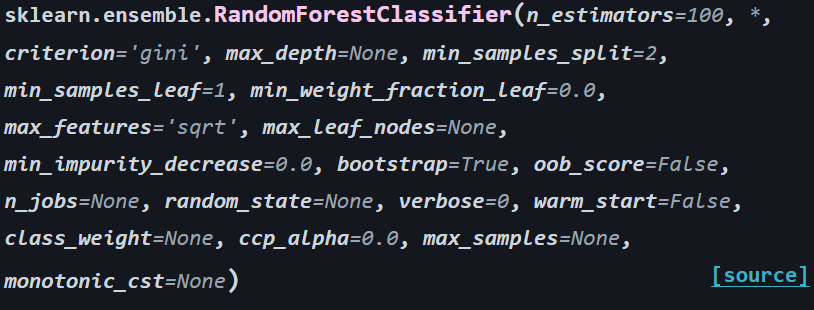



##  Key Hyperparameters of `RandomForestClassifier`

### 1. **n\_estimators**

* Number of trees in the forest.
* Default: `100`
* Higher = better performance (to a limit), but slower training.



### 2. **criterion**

* Function to measure the quality of a split.
* Options:

  * `"gini"` (default) → Gini impurity
  * `"entropy"` → Information gain
  * `"log_loss"` → Minimize log loss



### 3. **max\_depth**

* Maximum depth of each tree.
* Default: `None` (nodes expanded until all leaves are pure or min\_samples\_split is reached).
* Smaller values help prevent **overfitting**.



### 4. **min\_samples\_split**

* Minimum number of samples required to split an internal node.
* Default: `2`
* Larger values → more conservative tree (less overfitting).



### 5. **min\_samples\_leaf**

* Minimum number of samples required to be at a leaf node.
* Default: `1`
* Higher values smooth the model, prevent overfitting.



### 6. **max\_features**

* Number of features to consider when looking for the best split.
* Options:

  * `"sqrt"` (default for classifier → √features)
  * `"log2"`
  * `None` (all features)
  * Integer or float fraction



### 7. **bootstrap**

* Whether bootstrap samples are used when building trees.
* Default: `True`
* If `False`, the whole dataset is used to build each tree.



### 8. **oob\_score**

* Whether to use out-of-bag samples to estimate accuracy.
* Default: `False`
* Useful for validation without a separate test set.



### 9. **n\_jobs**

* Number of CPU cores to use.
* Default: `None` (1 core).
* `-1` → use all cores for faster training.



### 10. **random\_state**

* Controls randomness for reproducibility.
* Example: `random_state=42`



### 11. **class\_weight**

* Weights associated with classes.
* Options:

  * `None` (default → all classes have weight 1)
  * `"balanced"` → weights inversely proportional to class frequency.
  * Dict → custom weights `{0:0.3, 1:0.7}`



### 12. **max\_samples** (when `bootstrap=True`)

* Number of samples drawn from dataset to train each tree.
* Default: `None` (all samples with replacement).
* Can set fraction (e.g., `0.8`).


```python
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    criterion="gini",
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features="sqrt",
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)
```


## What is GridSearchCV?

* GridSearchCV = Grid Search with Cross Validation

* It tests all possible combinations of hyperparameters you specify in a grid.

* Picks the best set based on a scoring metric (like accuracy, f1, etc.).

## What is RandomSearchCV

* RandomizedSearchCV is like GridSearchCV, but instead of trying every possible combination of hyperparameters (which can be very slow), it samples random combinations from the search space for a fixed number of iterations.

* This makes it much faster while still finding good hyperparameters.

In [3]:
# import packege

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

In [4]:
# load the data

X, y = load_breast_cancer(return_X_y=True)

In [8]:
data=pd.DataFrame(X,columns=load_breast_cancer().feature_names)

In [9]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
# data split for test and train

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=44)

In [11]:
# model training
model = RandomForestClassifier(random_state=44)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=44)

In [12]:
# model prediction
y_predict_model=model.predict(X_test)

In [13]:
y_predict_model

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

In [14]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0])

In [15]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_predict_model)
print(accuracy)

0.9298245614035088


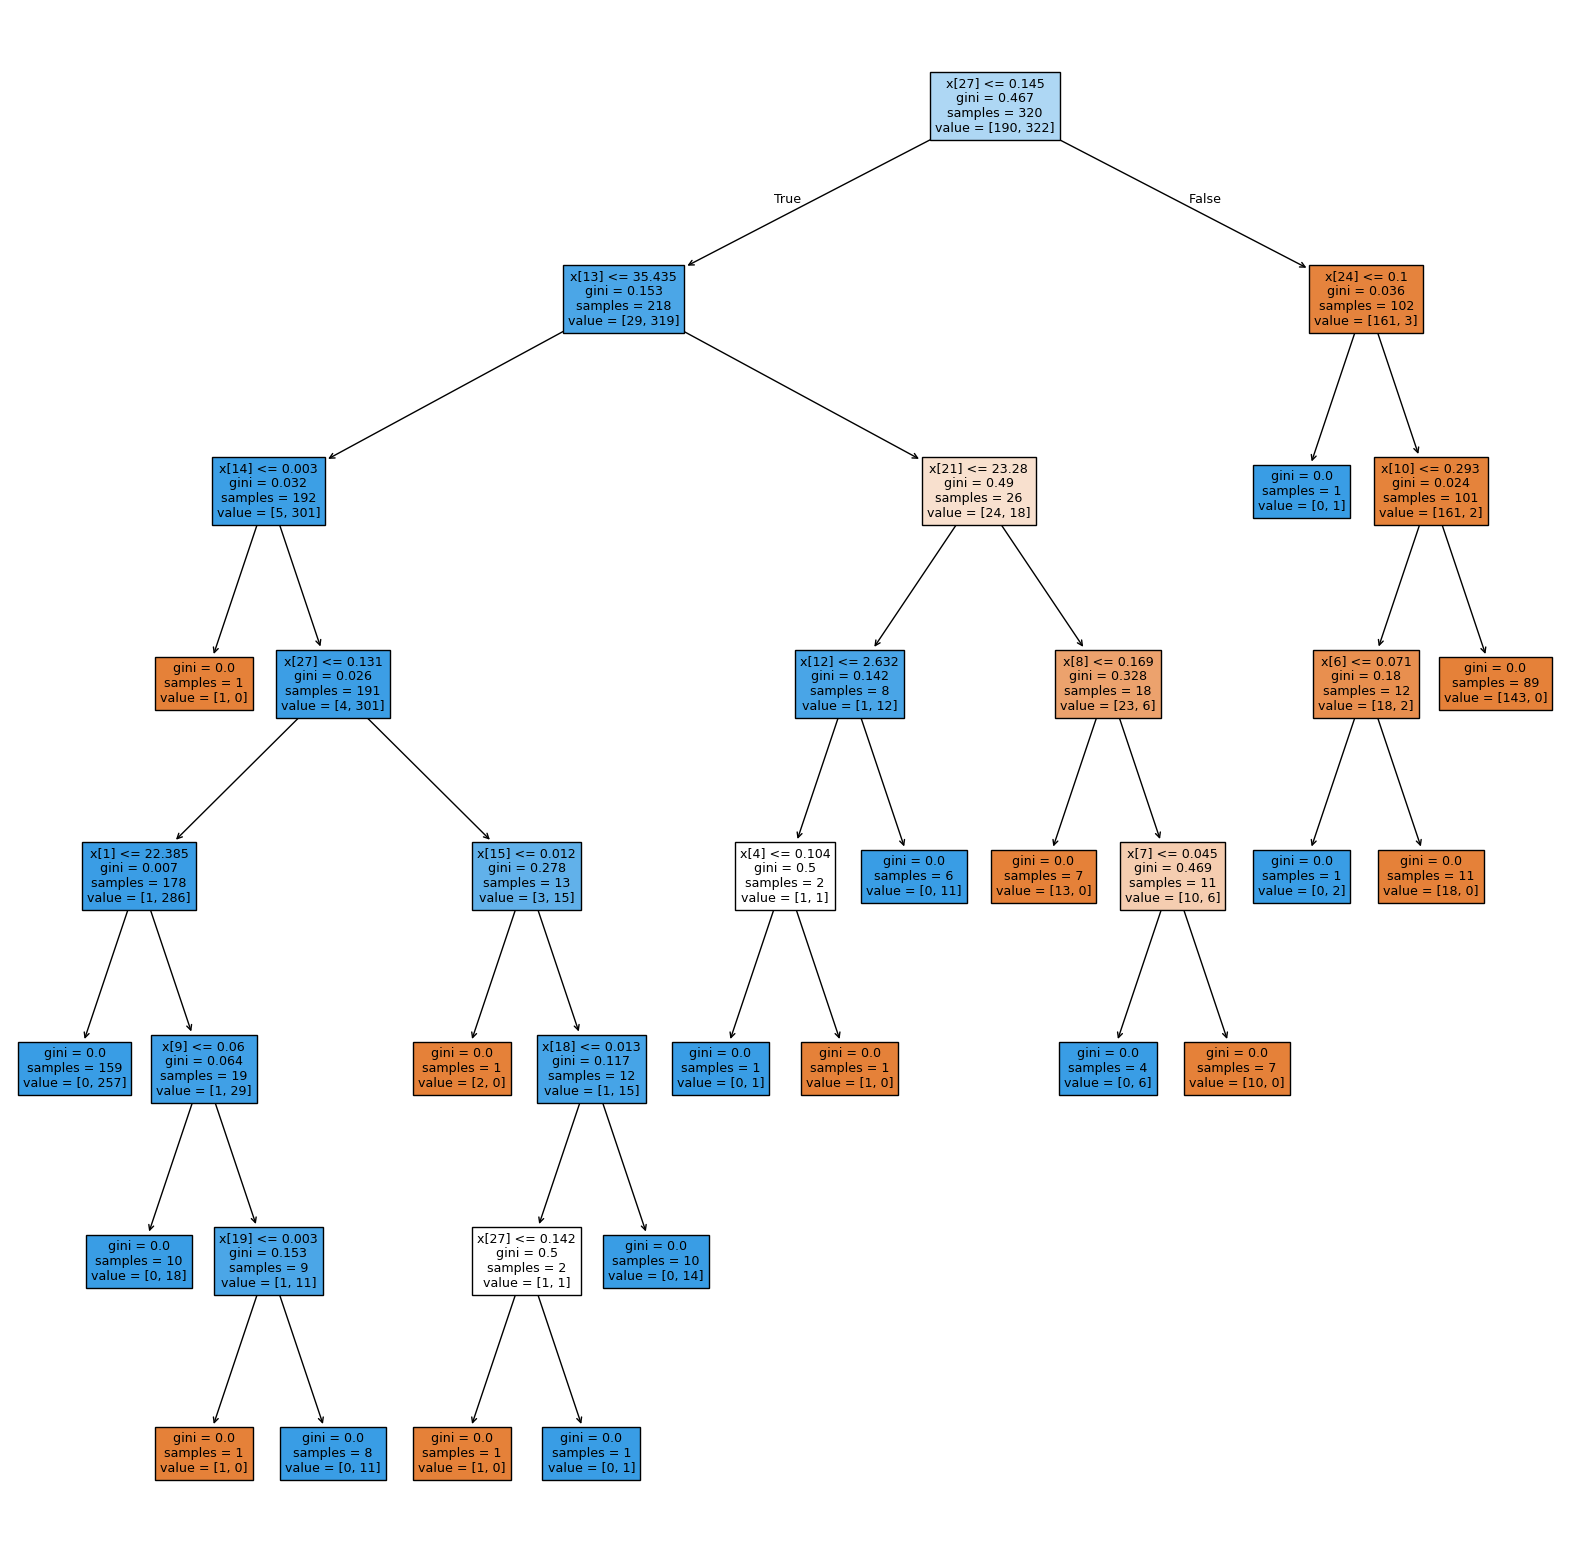

In [17]:
# graph plot
import matplotlib.pyplot as plt

from sklearn import tree
plt.figure(figsize=(20, 20))
tree.plot_tree(model.estimators_[19], filled=True)
plt.savefig('decision_tree.png')
plt.show()

# Hyperparameter Tuning

### GridSearchCv

In [18]:
grid_parameters = {
    'n_estimators': [50, 80, 100, 120],
    'criterion': ['gini', 'entropy'],
    'max_depth': range(10)
}


In [21]:
# train model for GridSearch CV
from sklearn.model_selection import GridSearchCV
grid_search_rf = GridSearchCV(estimator=model, param_grid=grid_parameters)
grid_search_rf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

GridSearchCV(estimator=RandomForestClassifier(random_state=44),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'n_estimators': [50, 80, 100, 120]})

In [22]:
# find best fit parameter
grid_search_rf.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 120}

In [23]:
# predict the model or test
y_predict_grid=grid_search_rf.predict(X_test)

In [24]:
accuracy_grid_model=accuracy_score(y_test, y_predict_grid)
print(accuracy_grid_model)

0.9298245614035088
